In [1]:
import sys
import os
current_dir = os.path.dirname(os.path.abspath(''))
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(current_dir)))
sys.path.append(parent_dir)
import streamProps
import math

class Format:
    end = '\033[0m'
    underline = '\033[4m'

In [2]:
print(Format.underline + "COLD STREAMS" + Format.end + "(from ASPEN HYSYS)")
cold1_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 71.9000, 1.1500*1e5, 2315.572061/3600, "R11")
cold1_In.printState()
cold1_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 110.999992, 1.1000*1e5, cold1_In.M, "R12")
cold1_Out.printState()

cold2_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 70.4174405, 7.6948*1e5, 49190.8020506/3600, "R24")
cold2_In.printState()
cold2_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 102.3397732, 7.5948*1e5, cold2_In.M, "R25")
cold2_Out.printState()

print(Format.underline + "HOT STREAMS" + Format.end + "(from ASPEN HYSYS)")
mainH2_In = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 106.00, 19.646*1e5, 5208.0/3600, "F04")
mainH2_In.x_para = 0.1/(math.exp(-175/mainH2_In.T)+0.1) - 7.06*(10**-9)*(mainH2_In.T**3) \
                        + 3.42*(10**-6)*(mainH2_In.T**2) - 6.2*(10**-5)*mainH2_In.T - 0.00227
print("F04 p-H2 mole fraction: " + str(round(mainH2_In.x_para,3)))
mainH2_In.printState()
mainH2_Out = streamProps.ThermoState("TP", "REFPROP::EQHYDROGEN", 73.500, 19.5664923500000*1e5, mainH2_In.M, "F05")
mainH2_Out.printState()

hot_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 112.00, 29.60*1e5, 34509.270655/3600, "R03a")
hot_In.printState()
hot_Out = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", 74.00, 29.500*1e5, hot_In.M, "R04")
hot_Out.printState()

COLD STREAMS(from ASPEN HYSYS)
Stream R11
M [kg/s]    =  0.6432
P [bar]     =  1.15
T [Kelvin]  =  71.9
H [kJ/kg]   =  998.46
S [kJ/kg.K] =  35.097


Stream R12
M [kg/s]    =  0.6432
P [bar]     =  1.1
T [Kelvin]  =  111.0
H [kJ/kg]   =  1429.742
S [kJ/kg.K] =  40.055


Stream R24
M [kg/s]    =  13.6641
P [bar]     =  7.695
T [Kelvin]  =  70.42
H [kJ/kg]   =  963.882
S [kJ/kg.K] =  26.833


Stream R25
M [kg/s]    =  13.6641
P [bar]     =  7.595
T [Kelvin]  =  102.34
H [kJ/kg]   =  1321.752
S [kJ/kg.K] =  31.072


HOT STREAMS(from ASPEN HYSYS)
F04 p-H2 mole fraction: 0.364
Stream F04
M [kg/s]    =  1.4467
P [bar]     =  19.646
T [Kelvin]  =  106.0
H [kJ/kg]   =  1799.816
S [kJ/kg.K] =  35.9


Stream F05
M [kg/s]    =  1.4467
P [bar]     =  19.566
T [Kelvin]  =  73.5
H [kJ/kg]   =  1295.063
S [kJ/kg.K] =  30.193


Stream R03a
M [kg/s]    =  9.5859
P [bar]     =  29.6
T [Kelvin]  =  112.0
H [kJ/kg]   =  1410.731
S [kJ/kg.K] =  26.283


Stream R04
M [kg/s]    =  9.5859
P [bar]     =  29.5


In [3]:
from scipy.optimize import minimize_scalar

def objective_function(x):
    return abs(cold1_In.M*(cold1_In.H-cold1_Out.H) + x*(cold2_In.H-cold2_Out.H) + hot_In.M*(hot_In.H-hot_Out.H))

res = minimize_scalar(objective_function)
massFlow2A = res.x

cold2A_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, massFlow2A, "R24A")
cold2A_In.printState()
cold2B_In = streamProps.ThermoState("TP", "REFPROP::HYDROGEN", cold2_In.T, cold2_In.P, cold2_In.M-massFlow2A, "R24B")
cold2B_In.printState()

Stream R24A
M [kg/s]    =  11.623
P [bar]     =  7.695
T [Kelvin]  =  70.42
H [kJ/kg]   =  963.882
S [kJ/kg.K] =  26.833


Stream R24B
M [kg/s]    =  2.0411
P [bar]     =  7.695
T [Kelvin]  =  70.42
H [kJ/kg]   =  963.882
S [kJ/kg.K] =  26.833




In [4]:
nParallelHx = 2

lengthPFHX = 2.496
widthPFHX  = 1.5000
heightPFHX = 0.9549
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

print(Format.underline + "Overall PFHX Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

lengthHXA     = 2.3501
widthHXA      = 1.5000
heightHXA     = 0.8301
volumeHXA     = lengthHXA*widthHXA*heightHXA

print(Format.underline + "HXA Geometry" + Format.end)
print("(based on ASPEN EDR)")
print("Length [m]  = ", lengthHXA)
print("Width  [m]  = ", widthHXA)
print("Height [m]  = ", heightHXA)
print("Volume [m3] = ", round(volumeHXA,3))
print("\n")

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))
print("\n")

Overall PFHX Geometry
(based on ASPEN EDR)
Length [m]  =  2.496
Width  [m]  =  1.5
Height [m]  =  0.9549
Volume [m3] =  3.575


HXA Geometry
(based on ASPEN EDR)
Length [m]  =  2.3501
Width  [m]  =  1.5
Height [m]  =  0.8301
Volume [m3] =  2.926


HXB Geometry
Length [m]  =  2.496
Width  [m]  =  1.5
Height [m]  =  0.173
Volume [m3] =  0.649




HXB Geometry
Length [m]  =  2.496
Width  [m]  =  1.5
Height [m]  =  0.173
Volume [m3] =  0.649

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          5.14e-06       0.00e+00          50              0       
Solved in 1 iterations, number of nodes 50. 
Maximum relative residual: 5.14e-06 
Maximum boundary residual: 0.00e+00


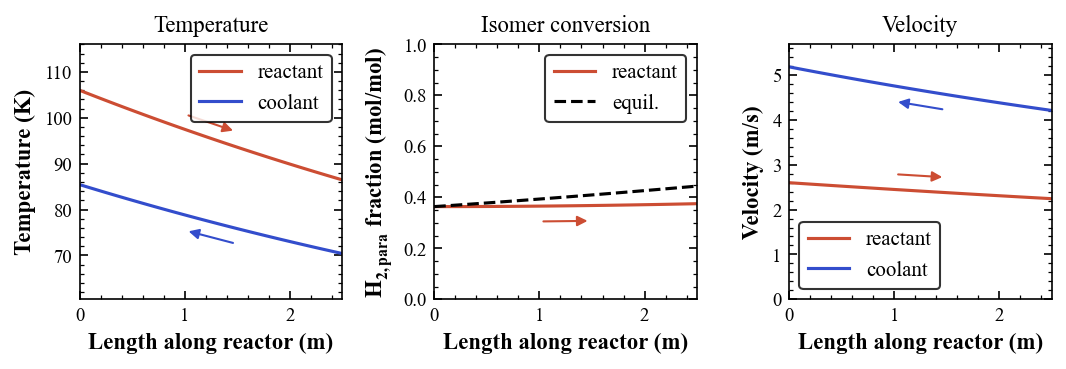

In [5]:
# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,         # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000         # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,          # m
        'width': widthHXB,            # m
        'height': heightHXB,          # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "HXB Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

Final HX-4 Geometry
Length [m]  =  4.8
Width  [m]  =  1.5
Height [m]  =  2.5
Volume [m3] =  18.0


HX-B Geometry
Length [m]  =  4.8
Width  [m]  =  1.5
Height [m]  =  2.094
Volume [m3] =  15.074

###### Running Simulation ######
   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          1.32e-01       0.00e+00          50             96       
       2          5.58e-07       0.00e+00          146             0       
Solved in 2 iterations, number of nodes 146. 
Maximum relative residual: 5.58e-07 
Maximum boundary residual: 0.00e+00


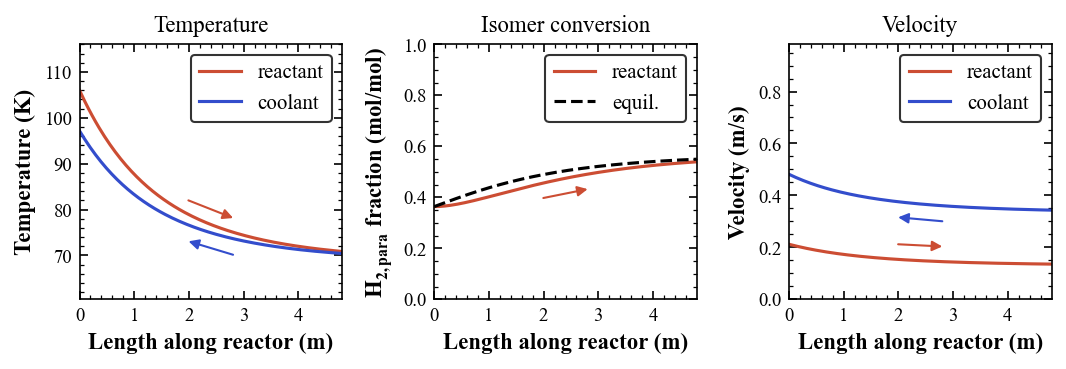

In [8]:
#Adjusted geometry
lengthPFHX = 4.80
widthPFHX = 1.50
heightPFHX = 2.50
volumePFHX = lengthPFHX*widthPFHX*heightPFHX

volumeHXB     = volumePFHX - volumeHXA
lengthHXB     = lengthPFHX
widthHXB      = widthPFHX
heightHXB     = volumeHXB/(lengthHXB*widthHXB)

# test for verifying model

### CONFIGURATION ###
configuration = {
    'reactant': {
        'mass_flow_rate': mainH2_In.M*86.4/nParallelHx, # tonne-per-day
        'x_para': mainH2_In.x_para,         # para-hydrogen fraction at inlet
        'temperature': mainH2_In.T,         # inlet temperature (K)
        'pressure': mainH2_In.P/1000        # inlet pressure (kPa)
    },
    'coolant': {
        'fluid': "Hydrogen",          # type of coolant
        'x_para': 0.25,               # normal hydrogen
        'mass_flow_rate': cold2B_In.M*86.4/nParallelHx,  # tonne-per-day
        'temperature':  cold2B_In.T,         # temperature of coolant at inlet (K)
        'pressure': cold2B_In.P/1000         # pressure of coolant at inlet (kPa)
    },
    'reactor': {
        'length': lengthHXB,          # m
        'width': widthHXB,            # m
        'height': heightHXB,          # m
        'fin_thickness': 0.2e-3,      # m
        'fin_height': 8.9e-3,         # m
        'fin_pitch': 1.27e-3,         # m
        'seration_length': 3.0e-3,    # m
        'parting_sheet_thickness': 1.5e-3 # m
    },
    'catalyst': {
        'solid_fraction': 0.31,       # volumetric fraction of catlayst particles within reactor
        'diameter': 424.0e-6,         # mean particle diameter
        'density': 4.0                # solid density of catalyst particles (g/cm3)
    },
    'simulation': {
        'nodes': 50,                  # number of nodes across reactor length to setup
        'tolerance': 1.0e-4,          # tolerance of bvp solver
        'delta_t': 1.0                # initial guess of temperature difference between streams
    }
}

# import packages
import matplotlib
from hydrogen_pfhx import model, outputs

print(Format.underline + "Final HX-4 Geometry" + Format.end)
print("Length [m]  = ", lengthPFHX)
print("Width  [m]  = ", widthPFHX)
print("Height [m]  = ", heightPFHX)
print("Volume [m3] = ", round(volumePFHX,3))
print("\n")

print(Format.underline + "HX-B Geometry" + Format.end)
print("Length [m]  = ", lengthHXB)
print("Width  [m]  = ", widthHXB)
print("Height [m]  = ", round(heightHXB,3))
print("Volume [m3] = ", round(volumeHXB,3))

# run the model with config
print('\n###### Running Simulation ######')
results = model.model(configuration)

# plot & display results!
outputs.plot_results(results)
matplotlib.pyplot.draw()

In [7]:
print(results)

        Z (m)  Reactant pressure (kPa)  Coolant pressure (kPa)  \
0    0.000000              1964.600000              769.378972   
1    0.048980              1964.561139              769.380363   
2    0.097959              1964.522743              769.381737   
3    0.146939              1964.484797              769.383095   
4    0.195918              1964.447287              769.384437   
..        ...                      ...                     ...   
136  4.636735              1961.898211              769.477048   
137  4.669388              1961.882183              769.477640   
138  4.702041              1961.866170              769.478230   
139  4.751020              1961.842179              769.479116   
140  4.800000              1961.818220              769.480000   

     Reactant temperature (K)  Coolant temperature (K)  \
0                  106.000000                96.945768   
1                  104.932492                96.128290   
2                  103.896075    